Реализация обучения нейронных сетей и соответсвующие блоки сделаны по аналогии с фреймворком PyTorch. Исходные файлы расположены в репозитории вместе с Jupiter ноутбуком

In [1]:
import numpy as np
from activations import Sigmoid
from criterions import CrossEntropyLoss
from dataloader import DataLoader
from layers import Linear, Sequential
from optimizers import SGD
from train import train

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()

Обучим нейронные сети, требуемые по заданию на датасете Iris. Рассмотрим метрики Accuracy и F1

In [3]:
np.random.seed(42)
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

train_loader = DataLoader(X_train, y_train, batch_size=64, shuffle=True)
test_loader = DataLoader(X_test, y_test, batch_size=64, shuffle=False)

model = Sequential(
    Linear(4, 3)
)
optimizer = SGD(model, lr=1e-2)
criterion = CrossEntropyLoss()

In [4]:
history = train(10000, model, optimizer, criterion, train_loader, test_loader)

Num epochs: 3083, best test loss: 0.16476345731723274


In [5]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = model(X_test).argmax(axis=1)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score micro:', f1_score(y_test, y_pred, average='micro'))
print('F1 score macro:', f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9666666666666667
F1 score micro: 0.9666666666666667
F1 score macro: 0.9665831244778612


In [6]:
model = Sequential(
    Linear(4, 10),
    Sigmoid(),
    Linear(10, 3)
)
optimizer = SGD(model, lr=1e-2)
criterion = CrossEntropyLoss()

In [7]:
history = train(10000, model, optimizer, criterion, train_loader, test_loader)

Num epochs: 4639, best test loss: 0.14268571144059208


In [8]:
y_pred = model(X_test).argmax(axis=1)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score micro:', f1_score(y_test, y_pred, average='micro'))
print('F1 score macro:', f1_score(y_test, y_pred, average='macro'))

Accuracy: 1.0
F1 score micro: 1.0
F1 score macro: 1.0


По метрикам видно, что модель с двумя слоями и 10 нейронами получилась лучше. Это не удивительно, так как она имеет более сложную структуру и может делать не только линейные обобщения

Отобразим теперь разделяющие линии моделей

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [19]:
def dividing_lines(model, title):
    X, y = data.data[:, :2], data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    train_loader = DataLoader(X_train, y_train, batch_size=64, shuffle=True)
    test_loader = DataLoader(X_test, y_test, batch_size=64, shuffle=False)
    optimizer = SGD(model, lr=1e-2)
    criterion = CrossEntropyLoss()
    train(10000, model, optimizer, criterion, train_loader, test_loader)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    
    Z = model(np.c_[xx.ravel(), yy.ravel()]).argmax(axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12, 10))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']),
                edgecolor='black', s=100)
    plt.title(title)
    plt.show()

Num epochs: 2371, best test loss: 0.5104907950255011


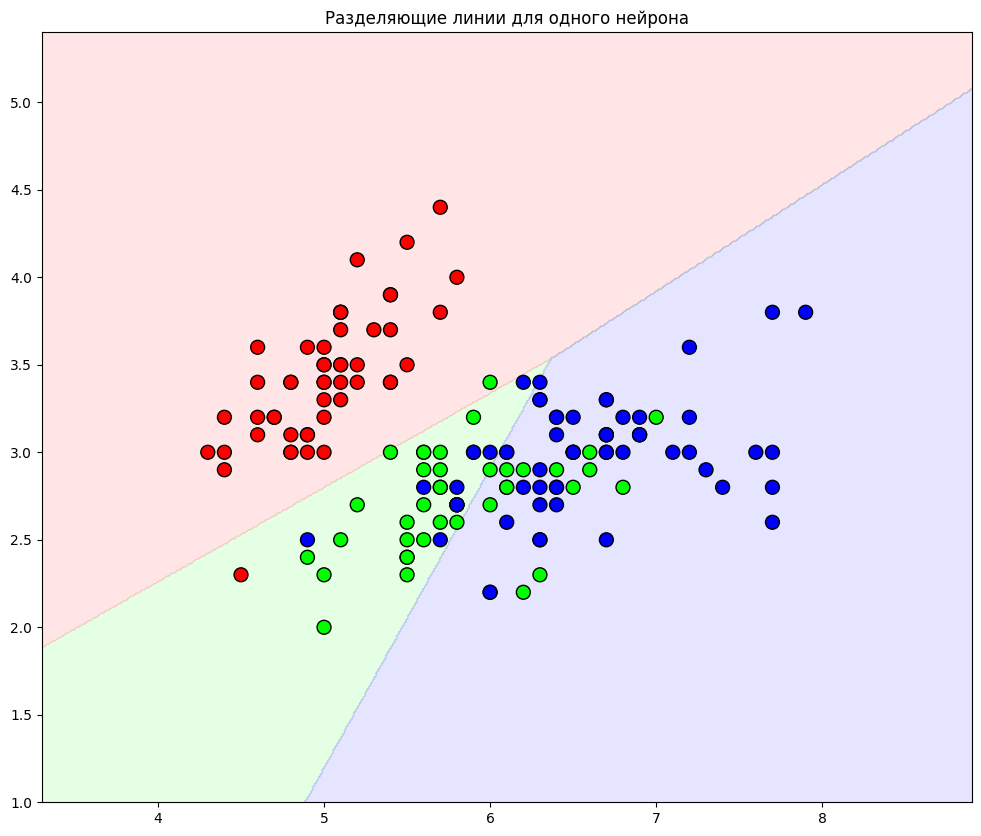

Num epochs: 5669, best test loss: 0.5263797447737887


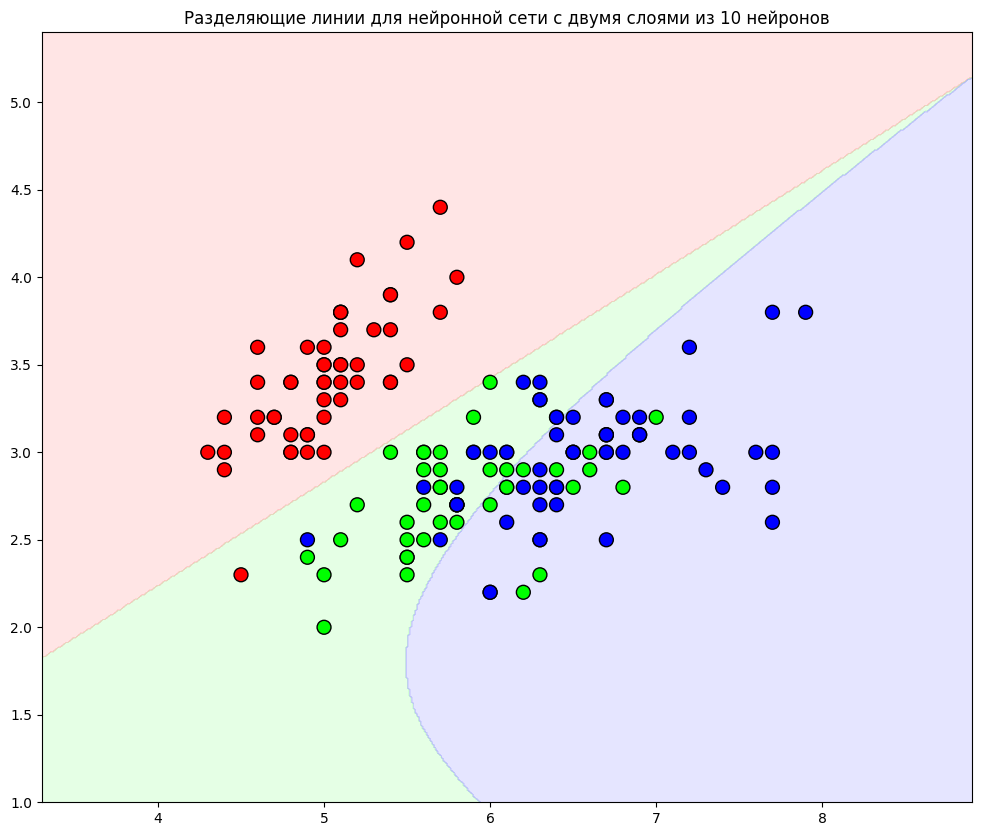

In [20]:
dividing_lines(Sequential(Linear(2, 3)), 'Разделяющие линии для одного нейрона')
dividing_lines(Sequential(Linear(2, 10), Sigmoid(), Linear(10, 3)), 'Разделяющие линии для нейронной сети с двумя слоями из 10 нейронов')